# Descriptive Statistics - Interactive Learning Notebook

**Author:** Md Ayan Alam  
**Roll Number:** GF202342645  
**Course:** Statistical Foundation of Data Science

---

## Learning Objectives

By the end of this notebook, you will be able to:
1. Calculate and interpret measures of central tendency
2. Compute and understand measures of dispersion
3. Visualize data distributions effectively
4. Choose appropriate descriptive statistics for different data types
5. Identify and handle outliers in datasets

---

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
sns.set_style("whitegrid")

print("📊 Libraries imported successfully!")
print("🎯 Ready for descriptive statistics exploration!")

📊 Libraries imported successfully!
🎯 Ready for descriptive statistics exploration!


## 1. Measures of Central Tendency

Central tendency measures help us understand the "typical" or "central" value in a dataset.

In [3]:
# Generate sample datasets for exploration
np.random.seed(42)

# Normal distribution data
normal_data = np.random.normal(100, 15, 1000)

# Skewed distribution data
skewed_data = np.random.exponential(2, 1000)

# Data with outliers
outlier_data = np.concatenate([np.random.normal(50, 10, 950), np.array([150, 160, 170, 180, 190] * 10)])

# Create a DataFrame for easy manipulation
data_df = pd.DataFrame({
    'normal': normal_data,
    'skewed': skewed_data,
    'with_outliers': outlier_data
})

print("📈 Sample datasets created:")
print(f"• Normal data: {len(normal_data)} observations")
print(f"• Skewed data: {len(skewed_data)} observations")
print(f"• Data with outliers: {len(outlier_data)} observations")

📈 Sample datasets created:
• Normal data: 1000 observations
• Skewed data: 1000 observations
• Data with outliers: 1000 observations


In [ ]:
# Calculate measures of central tendency
def calculate_central_tendency(data, name):
    """
    Calculate and display measures of central tendency
    """
    mean_val = np.mean(data)
    median_val = np.median(data)

    # Calculate mode (most frequent value)
    mode_result = stats.mode(data, keepdims=True)
    mode_val = mode_result.mode[0] if len(mode_result.mode) > 0 else "No unique mode"

    print(f"\n🔍 {name} Dataset:")
    print(f"   Mean:   {mean_val:.3f}")
    print(f"   Median: {median_val:.3f}")
    print(f"   Mode:   {mode_val}")

    return mean_val, median_val, mode_val

# Calculate for all datasets
results = {}
for col in data_df.columns:
    results[col] = calculate_central_tendency(data_df[col], col.replace('_', ' ').title())


🔍 Normal Dataset:
   Mean:   100.290
   Median: 100.380
   Mode:   51.38098989896391

🔍 Skewed Dataset:
   Mean:   2.016
   Median: 1.452
   Mode:   0.00644690670446925

🔍 With Outliers Dataset:
   Mean:   56.186
   Median: 50.891
   Mode:   150.0


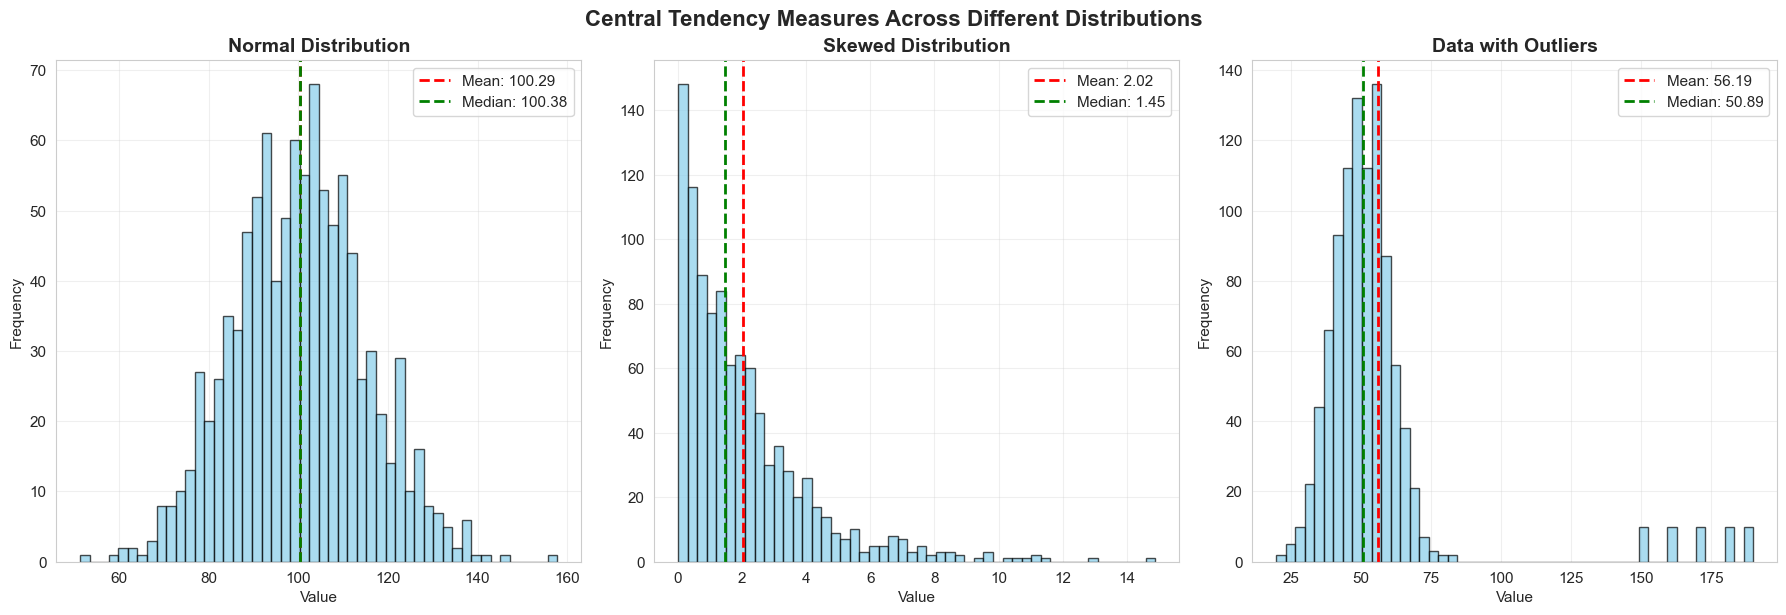

In [ ]:
# Visualize central tendency measures
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

datasets = ['normal', 'skewed', 'with_outliers']
titles = ['Normal Distribution', 'Skewed Distribution', 'Data with Outliers']

for i, (dataset, title) in enumerate(zip(datasets, titles)):
    data = data_df[dataset]
    mean_val, median_val, _ = results[dataset]

    # Create histogram
    axes[i].hist(data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')

    # Add vertical lines for mean and median
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Central Tendency Measures Across Different Distributions', y=1.02, fontsize=16, fontweight='bold')
plt.show()

### 💡 Key Insights:

- **Normal Distribution**: Mean ≈ Median (symmetric)
- **Skewed Distribution**: Mean > Median (right-skewed)
- **Data with Outliers**: Mean pulled toward outliers, median more robust

---

## 2. Measures of Dispersion

Dispersion measures tell us how spread out the data is around the central value.

In [ ]:
# Calculate measures of dispersion
def calculate_dispersion(data, name):
    """
    Calculate and display measures of dispersion
    """
    variance = np.var(data, ddof=1)  # Sample variance
    std_dev = np.std(data, ddof=1)   # Sample standard deviation
    data_range = np.max(data) - np.min(data)

    # Quartiles and IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Coefficient of Variation
    cv = (std_dev / np.mean(data)) * 100

    print(f"\n📏 {name} Dataset Dispersion:")
    print(f"   Variance:     {variance:.3f}")
    print(f"   Std Dev:      {std_dev:.3f}")
    print(f"   Range:        {data_range:.3f}")
    print(f"   IQR:          {iqr:.3f}")
    print(f"   CV:           {cv:.2f}%")

    return {
        'variance': variance,
        'std_dev': std_dev,
        'range': data_range,
        'iqr': iqr,
        'cv': cv,
        'q1': q1,
        'q3': q3
    }

# Calculate dispersion for all datasets
dispersion_results = {}
for col in data_df.columns:
    dispersion_results[col] = calculate_dispersion(data_df[col], col.replace('_', ' ').title())


📏 Normal Dataset Dispersion:
   Variance:     215.744
   Std Dev:      14.688
   Range:        106.410
   IQR:          19.433
   CV:           14.65%

📏 Skewed Dataset Dispersion:
   Variance:     4.024
   Std Dev:      2.006
   Range:        14.877
   IQR:          2.175
   CV:           99.50%

📏 With Outliers Dataset Dispersion:
   Variance:     783.153
   Std Dev:      27.985
   Range:        170.195
   IQR:          14.079
   CV:           49.81%


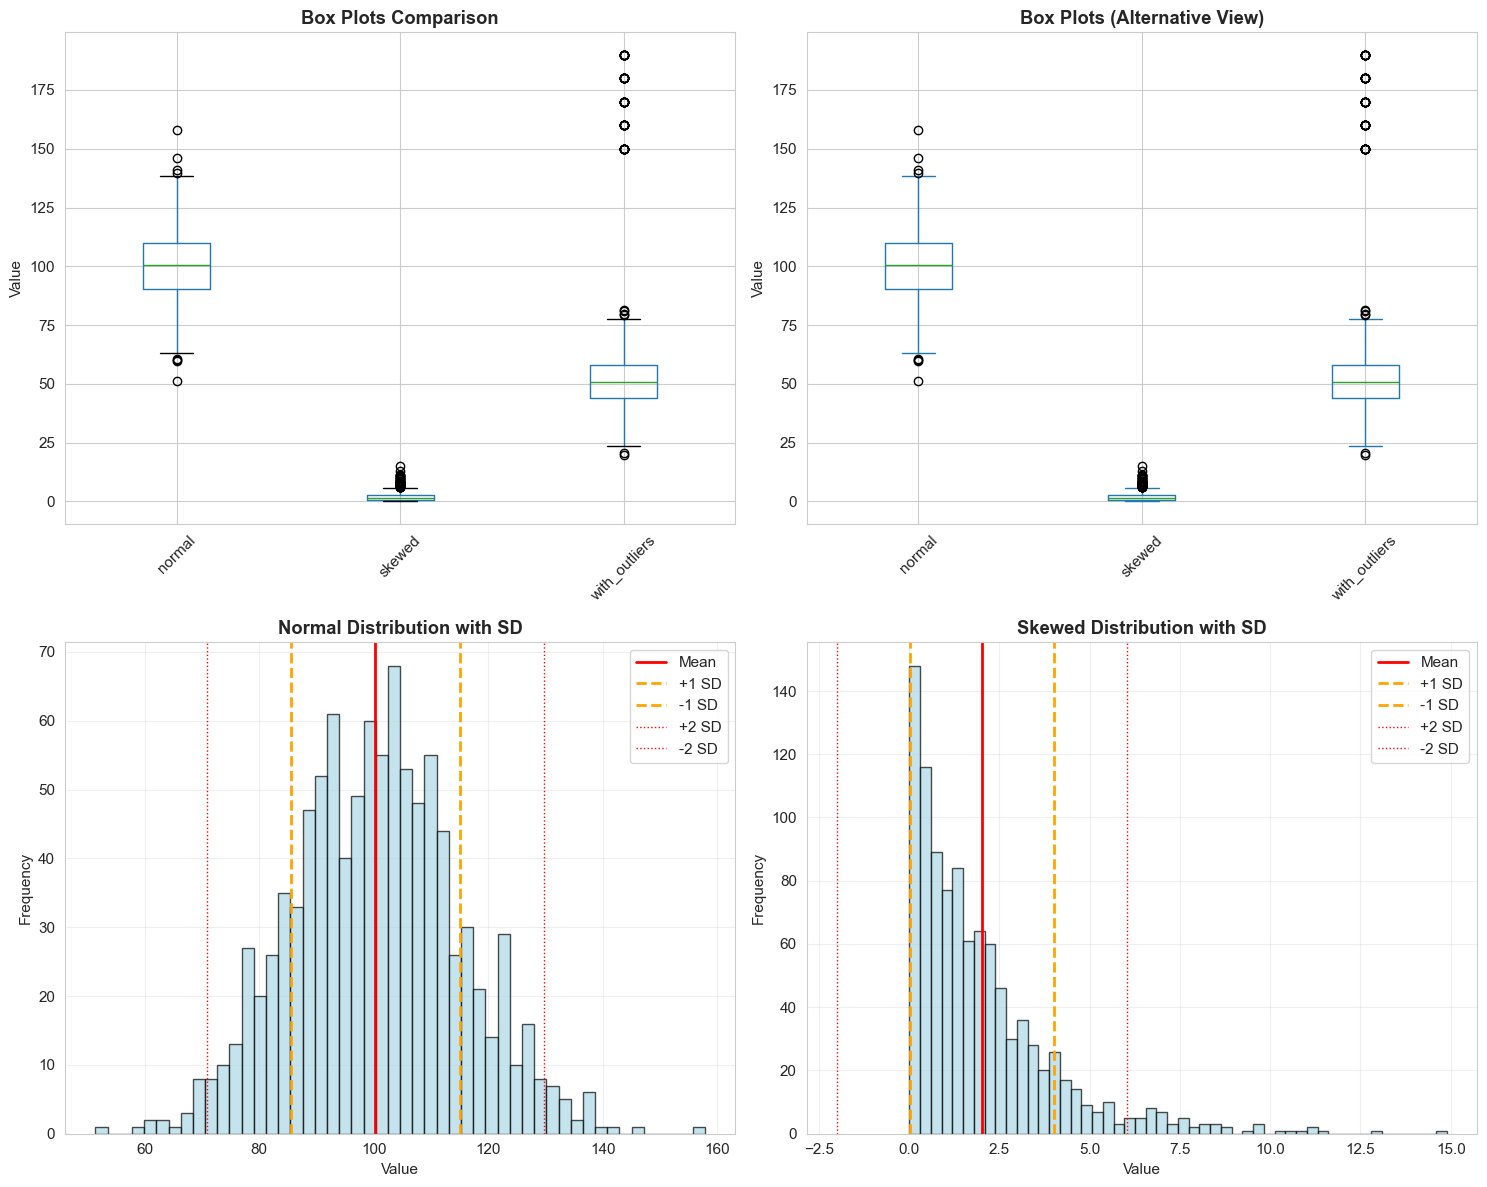

In [ ]:
# Create box plots to visualize dispersion
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Box plots
data_df.boxplot(ax=axes[0, 0])
axes[0, 0].set_title('Box Plots Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Value')
axes[0, 0].tick_params(axis='x', rotation=45)

# Violin plots for distribution shape
data_df.plot.box(ax=axes[0, 1])
axes[0, 1].set_title('Box Plots (Alternative View)', fontweight='bold')
axes[0, 1].set_ylabel('Value')
axes[0, 1].tick_params(axis='x', rotation=45)

# Standard deviation visualization
for i, col in enumerate(['normal', 'skewed']):
    data = data_df[col]
    mean_val = np.mean(data)
    std_val = dispersion_results[col]['std_dev']

    axes[1, i].hist(data, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    axes[1, i].axvline(mean_val, color='red', linestyle='-', linewidth=2, label='Mean')
    axes[1, i].axvline(mean_val + std_val, color='orange', linestyle='--', linewidth=2, label='+1 SD')
    axes[1, i].axvline(mean_val - std_val, color='orange', linestyle='--', linewidth=2, label='-1 SD')
    axes[1, i].axvline(mean_val + 2*std_val, color='red', linestyle=':', linewidth=1, label='+2 SD')
    axes[1, i].axvline(mean_val - 2*std_val, color='red', linestyle=':', linewidth=1, label='-2 SD')

    axes[1, i].set_title(f'{col.replace("_", " ").title()} Distribution with SD', fontweight='bold')
    axes[1, i].set_xlabel('Value')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Comparing Different Data Types

Let's work with a real-world dataset to practice choosing appropriate descriptive statistics.

In [9]:
# Create a realistic student dataset
np.random.seed(123)
n_students = 500

student_data = pd.DataFrame({
    'student_id': range(1, n_students + 1),
    'age': np.random.normal(20, 2, n_students).round().astype(int),
    'height_cm': np.random.normal(170, 10, n_students).round(1),
    'weight_kg': np.random.normal(65, 12, n_students).round(1),
    'exam_score': np.random.beta(7, 2, n_students) * 100,  # Slightly left-skewed
    'study_hours': np.random.exponential(3, n_students),  # Right-skewed
    'gender': np.random.choice(['Male', 'Female'], n_students),
    'major': np.random.choice(['CS', 'Math', 'Physics', 'Biology', 'Chemistry'], n_students),
    'year': np.random.choice([1, 2, 3, 4], n_students)
})

# Add some outliers for realism
outlier_indices = np.random.choice(n_students, 10, replace=False)
student_data.loc[outlier_indices, 'study_hours'] += np.random.uniform(10, 20, 10)

print("👥 Student Dataset Created:")
print(student_data.head())
print(f"\nDataset shape: {student_data.shape}")
print(f"\nData types:\n{student_data.dtypes}")

👥 Student Dataset Created:
   student_id  age  height_cm  weight_kg  exam_score  study_hours  gender  \
0           1   18      177.5       56.0   70.585996     1.356325  Female   
1           2   22      170.7       71.8   78.126156     0.327277  Female   
2           3   21      167.3       73.6   89.160759     0.493482  Female   
3           4   17      179.3       53.0   78.432213    11.389447  Female   
4           5   19      182.6       70.7   60.222141     4.469733  Female   

       major  year  
0         CS     1  
1    Biology     2  
2    Physics     2  
3  Chemistry     3  
4    Physics     3  

Dataset shape: (500, 9)

Data types:
student_id       int64
age              int64
height_cm      float64
weight_kg      float64
exam_score     float64
study_hours    float64
gender          object
major           object
year             int64
dtype: object


In [10]:
# Comprehensive descriptive statistics
def comprehensive_stats(data, column_name):
    """
    Generate comprehensive descriptive statistics for a column
    """
    if data.dtype in ['object', 'category']:
        # Categorical data
        print(f"\n📊 {column_name} (Categorical):")
        print(f"   Unique values: {data.nunique()}")
        print(f"   Mode: {data.mode().iloc[0]}")
        print(f"   Most frequent: {data.value_counts().index[0]} ({data.value_counts().iloc[0]} times)")
        return data.value_counts()
    else:
        # Numerical data
        print(f"\n📈 {column_name} (Numerical):")
        print(f"   Count:    {data.count()}")
        print(f"   Mean:     {data.mean():.3f}")
        print(f"   Median:   {data.median():.3f}")
        print(f"   Std Dev:  {data.std():.3f}")
        print(f"   Min:      {data.min():.3f}")
        print(f"   Max:      {data.max():.3f}")
        print(f"   Q1:       {data.quantile(0.25):.3f}")
        print(f"   Q3:       {data.quantile(0.75):.3f}")
        print(f"   IQR:      {data.quantile(0.75) - data.quantile(0.25):.3f}")
        print(f"   Skewness: {data.skew():.3f}")
        print(f"   Kurtosis: {data.kurtosis():.3f}")
        return data.describe()

# Analyze key variables
variables_to_analyze = ['exam_score', 'study_hours', 'height_cm', 'gender', 'major']

analysis_results = {}
for var in variables_to_analyze:
    analysis_results[var] = comprehensive_stats(student_data[var], var)


📈 exam_score (Numerical):
   Count:    500
   Mean:     76.910
   Median:   78.474
   Std Dev:  12.661
   Min:      32.077
   Max:      99.719
   Q1:       68.094
   Q3:       86.169
   IQR:      18.076
   Skewness: -0.652
   Kurtosis: 0.173

📈 study_hours (Numerical):
   Count:    500
   Mean:     3.201
   Median:   2.096
   Std Dev:  3.611
   Min:      0.010
   Max:      26.354
   Q1:       0.798
   Q3:       4.064
   IQR:      3.267
   Skewness: 2.459
   Kurtosis: 8.227

📈 height_cm (Numerical):
   Count:    500
   Mean:     169.596
   Median:   169.550
   Std Dev:  9.993
   Min:      138.300
   Max:      205.700
   Q1:       163.200
   Q3:       176.550
   IQR:      13.350
   Skewness: -0.051
   Kurtosis: 0.059

📊 gender (Categorical):
   Unique values: 2
   Mode: Female
   Most frequent: Female (252 times)

📊 major (Categorical):
   Unique values: 5
   Mode: CS
   Most frequent: CS (109 times)


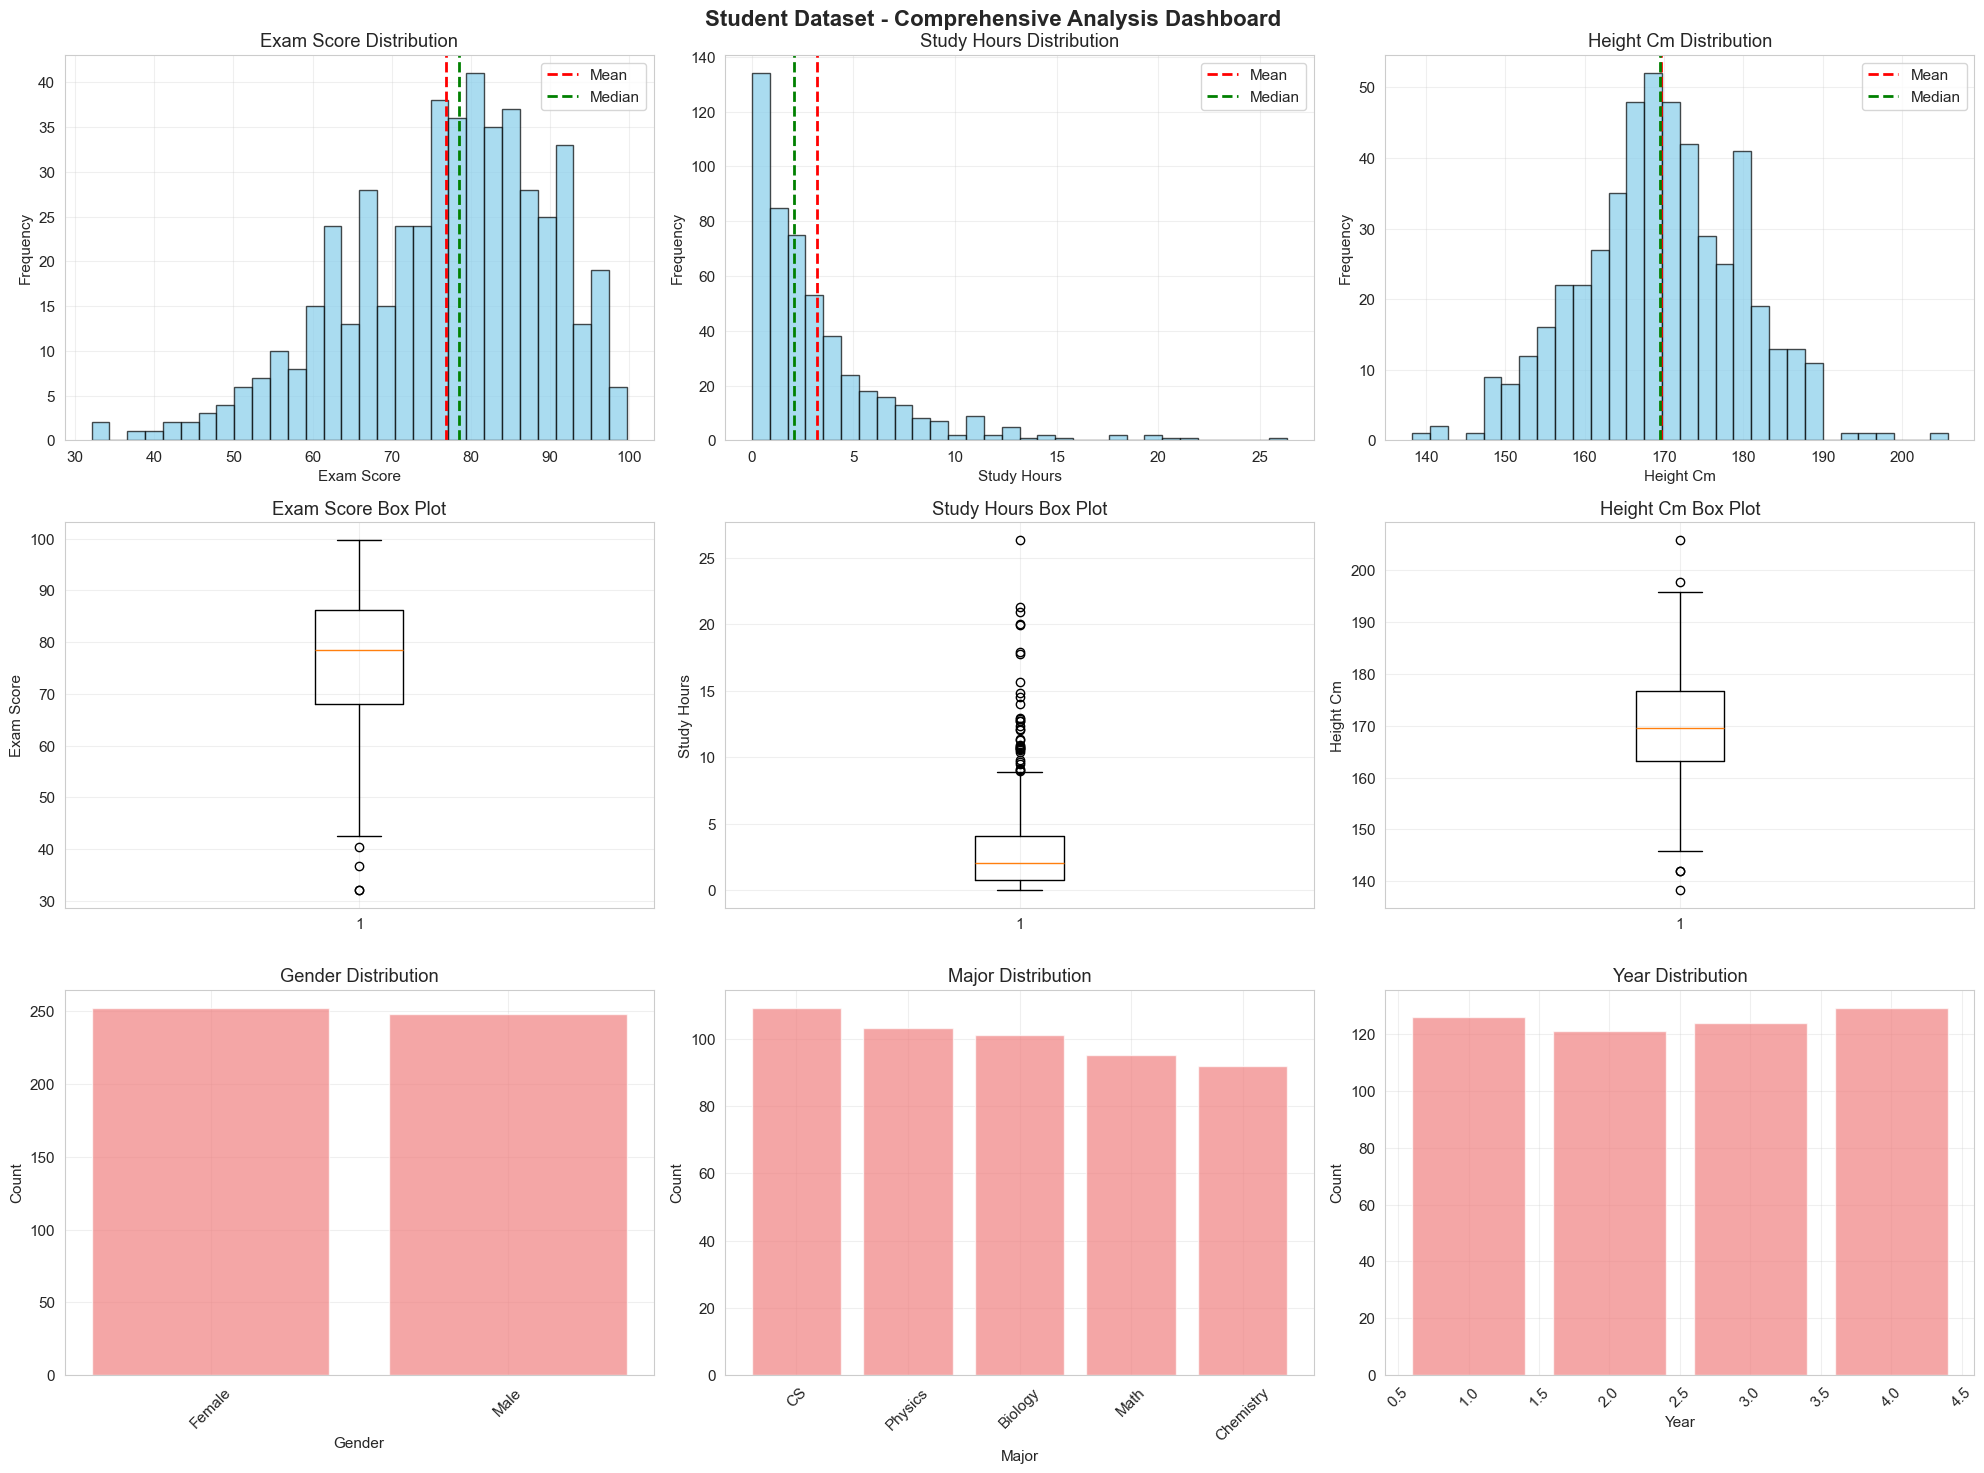

In [11]:
# Create comprehensive visualization dashboard
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Student Dataset - Comprehensive Analysis Dashboard', fontsize=16, fontweight='bold')

# Row 1: Distributions of continuous variables
continuous_vars = ['exam_score', 'study_hours', 'height_cm']
for i, var in enumerate(continuous_vars):
    axes[0, i].hist(student_data[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].axvline(student_data[var].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[0, i].axvline(student_data[var].median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[0, i].set_title(f'{var.replace("_", " ").title()} Distribution')
    axes[0, i].set_xlabel(var.replace('_', ' ').title())
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

# Row 2: Box plots for continuous variables
for i, var in enumerate(continuous_vars):
    axes[1, i].boxplot(student_data[var])
    axes[1, i].set_title(f'{var.replace("_", " ").title()} Box Plot')
    axes[1, i].set_ylabel(var.replace('_', ' ').title())
    axes[1, i].grid(True, alpha=0.3)

# Row 3: Categorical variable analysis
categorical_vars = ['gender', 'major', 'year']
for i, var in enumerate(categorical_vars):
    value_counts = student_data[var].value_counts()
    axes[2, i].bar(value_counts.index, value_counts.values, color='lightcoral', alpha=0.7)
    axes[2, i].set_title(f'{var.replace("_", " ").title()} Distribution')
    axes[2, i].set_xlabel(var.replace('_', ' ').title())
    axes[2, i].set_ylabel('Count')
    axes[2, i].tick_params(axis='x', rotation=45)
    axes[2, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Outlier Detection and Treatment

Outliers can significantly affect descriptive statistics. Let's learn how to identify and handle them.

In [ ]:
# Outlier detection methods
def detect_outliers_iqr(data, column):
    """
    Detect outliers using the IQR method
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """
    Detect outliers using the Z-score method
    """
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers, threshold

# Analyze outliers in study_hours
print("🔍 Outlier Analysis for Study Hours:")

# IQR method
iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(student_data, 'study_hours')
print(f"\n📊 IQR Method:")
print(f"   Lower bound: {lower_bound:.2f}")
print(f"   Upper bound: {upper_bound:.2f}")
print(f"   Number of outliers: {len(iqr_outliers)}")

# Z-score method
zscore_outliers, threshold = detect_outliers_zscore(student_data, 'study_hours')
print(f"\n📈 Z-Score Method (threshold = {threshold}):")
print(f"   Number of outliers: {len(zscore_outliers)}")

if len(iqr_outliers) > 0:
    print(f"\n🎯 Sample outliers (IQR method):")
    print(iqr_outliers[['student_id', 'study_hours']].head())

🔍 Outlier Analysis for Study Hours:

📊 IQR Method:
   Lower bound: -4.10
   Upper bound: 8.96
   Number of outliers: 34

📈 Z-Score Method (threshold = 3):
   Number of outliers: 10

🎯 Sample outliers (IQR method):
    student_id  study_hours
3            4    11.389447
12          13    12.118302
13          14    12.722023
15          16    12.354174
81          82    17.961847


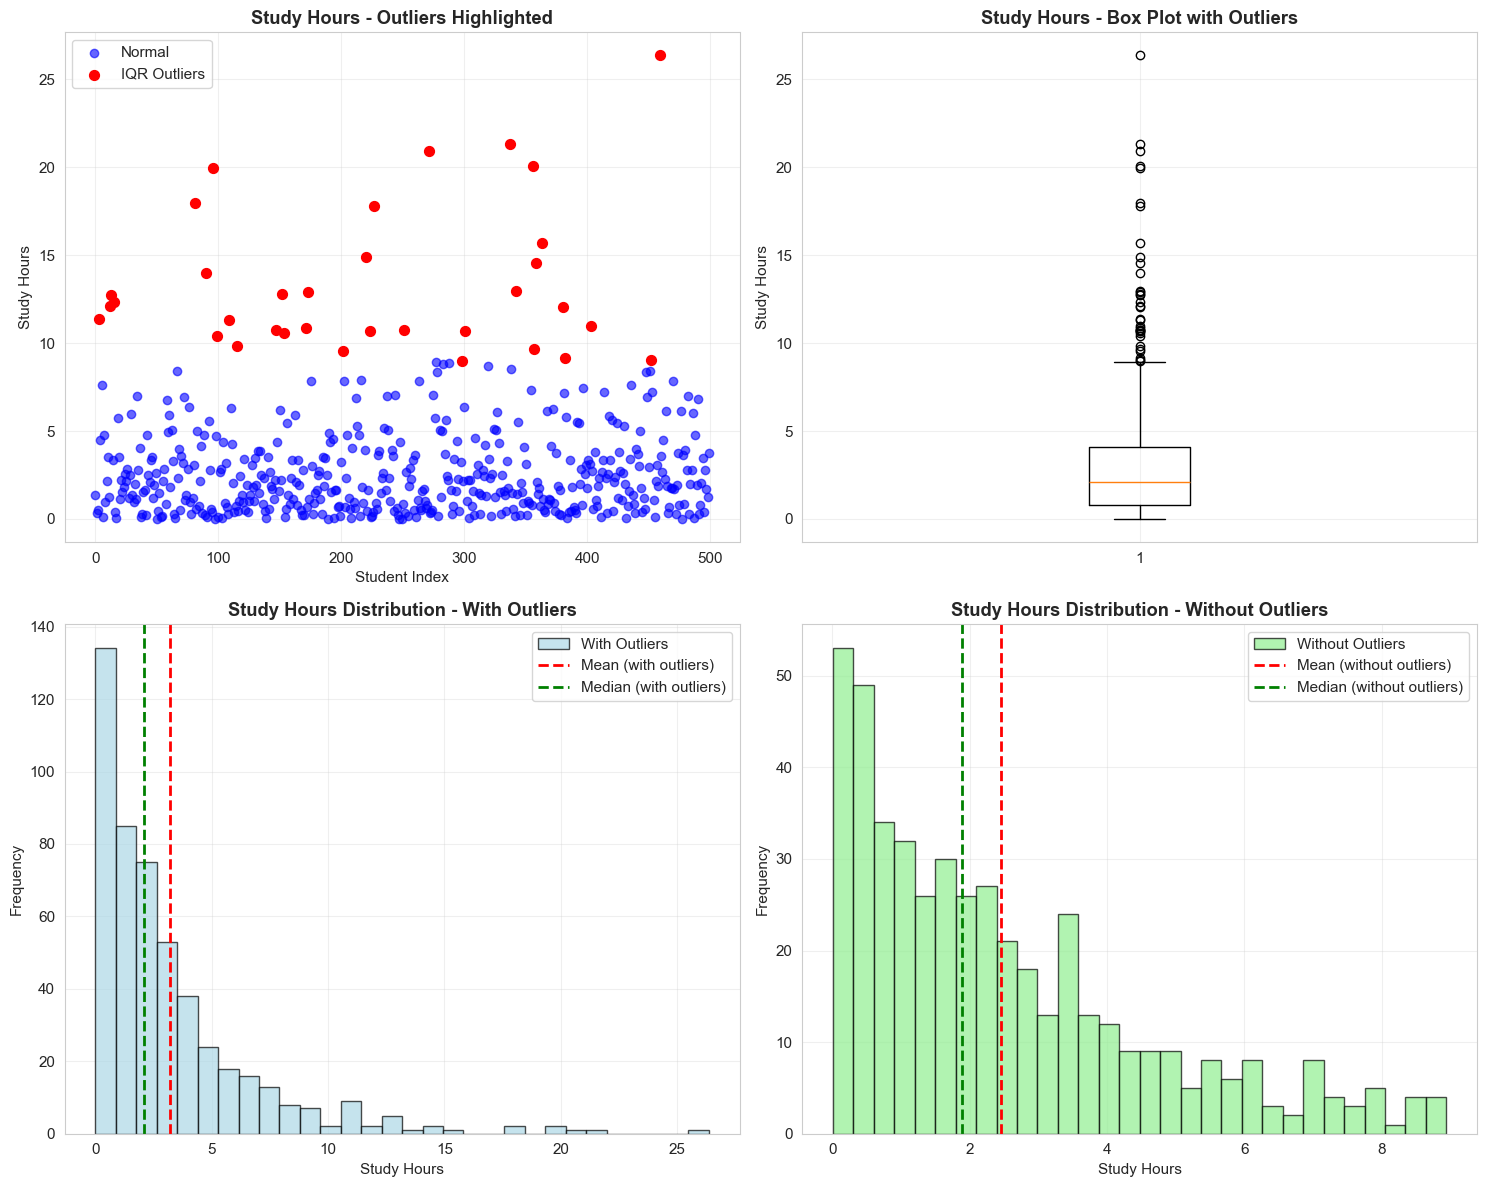


📊 Impact of Outliers on Descriptive Statistics:

   WITH OUTLIERS:
   Mean:   3.201
   Median: 2.096
   Std:    3.611

   WITHOUT OUTLIERS:
   Mean:   2.456
   Median: 1.887
   Std:    2.130


In [ ]:
# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Original data with outliers highlighted
axes[0, 0].scatter(range(len(student_data)), student_data['study_hours'], alpha=0.6, color='blue', label='Normal')
if len(iqr_outliers) > 0:
    axes[0, 0].scatter(iqr_outliers.index, iqr_outliers['study_hours'],
                      color='red', s=50, label='IQR Outliers')
axes[0, 0].set_title('Study Hours - Outliers Highlighted', fontweight='bold')
axes[0, 0].set_xlabel('Student Index')
axes[0, 0].set_ylabel('Study Hours')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot showing outliers
axes[0, 1].boxplot(student_data['study_hours'])
axes[0, 1].set_title('Study Hours - Box Plot with Outliers', fontweight='bold')
axes[0, 1].set_ylabel('Study Hours')
axes[0, 1].grid(True, alpha=0.3)

# Histogram with and without outliers
axes[1, 0].hist(student_data['study_hours'], bins=30, alpha=0.7, color='lightblue',
               edgecolor='black', label='With Outliers')
axes[1, 0].axvline(student_data['study_hours'].mean(), color='red', linestyle='--',
                  linewidth=2, label='Mean (with outliers)')
axes[1, 0].axvline(student_data['study_hours'].median(), color='green', linestyle='--',
                  linewidth=2, label='Median (with outliers)')
axes[1, 0].set_title('Study Hours Distribution - With Outliers', fontweight='bold')
axes[1, 0].set_xlabel('Study Hours')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Remove outliers and show distribution
clean_data = student_data[(student_data['study_hours'] >= lower_bound) &
                         (student_data['study_hours'] <= upper_bound)]
axes[1, 1].hist(clean_data['study_hours'], bins=30, alpha=0.7, color='lightgreen',
               edgecolor='black', label='Without Outliers')
axes[1, 1].axvline(clean_data['study_hours'].mean(), color='red', linestyle='--',
                  linewidth=2, label='Mean (without outliers)')
axes[1, 1].axvline(clean_data['study_hours'].median(), color='green', linestyle='--',
                  linewidth=2, label='Median (without outliers)')
axes[1, 1].set_title('Study Hours Distribution - Without Outliers', fontweight='bold')
axes[1, 1].set_xlabel('Study Hours')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare statistics with and without outliers
print("\n📊 Impact of Outliers on Descriptive Statistics:")
print(f"\n   WITH OUTLIERS:")
print(f"   Mean:   {student_data['study_hours'].mean():.3f}")
print(f"   Median: {student_data['study_hours'].median():.3f}")
print(f"   Std:    {student_data['study_hours'].std():.3f}")

print(f"\n   WITHOUT OUTLIERS:")
print(f"   Mean:   {clean_data['study_hours'].mean():.3f}")
print(f"   Median: {clean_data['study_hours'].median():.3f}")
print(f"   Std:    {clean_data['study_hours'].std():.3f}")

## 5. Practical Exercises

Now it's your turn! Complete these exercises to test your understanding.

In [15]:
# Exercise 1: Create your own dataset and analyze it
print("🎯 Exercise 1: Create and analyze your own dataset")
print("\nTask: Create a dataset representing house prices with the following characteristics:")
print("- 200 houses")
print("- Prices normally distributed around $300,000 with std of $75,000")
print("- Add 10 outliers (luxury houses) with prices between $800,000 - $1,200,000")
print("\nThen calculate and compare descriptive statistics with and without outliers.")

# Your code here:
# TODO: Complete this exercise

🎯 Exercise 1: Create and analyze your own dataset

Task: Create a dataset representing house prices with the following characteristics:
- 200 houses
- Prices normally distributed around $300,000 with std of $75,000
- Add 10 outliers (luxury houses) with prices between $800,000 - $1,200,000

Then calculate and compare descriptive statistics with and without outliers.


In [16]:
# Exercise 2: Choosing appropriate measures
print("🎯 Exercise 2: Choose appropriate descriptive statistics")
print("\nFor each scenario, determine the best measure of central tendency and dispersion:")
print("\n1. Income data (highly skewed)")
print("2. Test scores (normally distributed)")
print("3. Customer satisfaction ratings (1-5 scale)")
print("4. Website response times (right-skewed with outliers)")

# Your analysis here:
# TODO: Provide reasoning for each scenario

🎯 Exercise 2: Choose appropriate descriptive statistics

For each scenario, determine the best measure of central tendency and dispersion:

1. Income data (highly skewed)
2. Test scores (normally distributed)
3. Customer satisfaction ratings (1-5 scale)
4. Website response times (right-skewed with outliers)


## 6. Key Takeaways and Best Practices

### 🎯 When to Use Each Measure:

#### Central Tendency:
- **Mean**: Normal distributions, no outliers
- **Median**: Skewed distributions, presence of outliers
- **Mode**: Categorical data, finding most common value

#### Dispersion:
- **Standard Deviation**: Normal distributions, reporting with mean
- **IQR**: Skewed distributions, robust to outliers
- **Range**: Quick assessment, but sensitive to outliers
- **Coefficient of Variation**: Comparing variability across different scales

### 📋 Best Practices:

1. **Always visualize your data first**
2. **Check for outliers before choosing statistics**
3. **Consider the distribution shape**
4. **Report multiple measures when appropriate**
5. **Provide context and interpretation**
6. **Consider your audience when presenting results**

### 🚫 Common Mistakes to Avoid:

1. Using mean for highly skewed data
2. Ignoring outliers
3. Not checking assumptions
4. Over-interpreting small differences
5. Forgetting to consider sample size

---

## 📚 Additional Resources

- **Companion Notes**: `01_descriptive_statistics_notes.md`
- **Formula Reference**: `statistical_formulas_reference.ipynb`
- **Practice Problems**: Complete the exercises above
- **Next Topic**: Probability Distributions

---

*This notebook provides hands-on experience with descriptive statistics. Practice with different datasets to build your intuition!* 📊